In [1]:
# Importando as bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import scienceplots
from scipy import signal

#Exibição dos gráficos em janela externa:
#%matplotlib qt

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 16 
plt.rcParams['figure.figsize'] = (12, 6)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


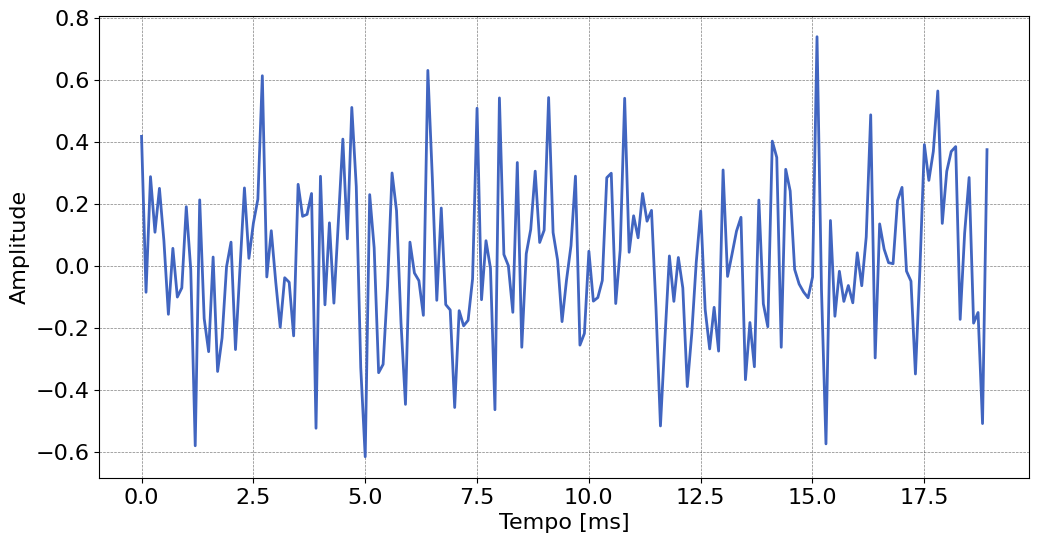

In [2]:
#Número de amostras:
N = 1e4

#Vetor de tempo:
tf = 1000   #milissegundos
toff = 1    #milissegundos
i0 = (toff*int(N/tf)) 
t = np.linspace(-toff, tf, (int(N)+i0))

#Gerando o sinal:
s = []
for i in range(i0):
    s.append(0)
for k in range(int(N)):
    s.append(2*k*(0.9**k))

#Gerando o ruído:
rng = np.random.default_rng()
d = rng.standard_normal(int(N)+i0)
d  /= np.max(d)

#Sinal com ruído:
y = (s + d)

#Plot:
plt.figure(1)
plt.plot(t[i0:int(20*(N/tf))], d[i0:int(20*(N/tf))])
plt.ylabel('Amplitude')
plt.xlabel('Tempo [ms]')
plt.savefig('d.eps', dpi=600, transparent=True, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


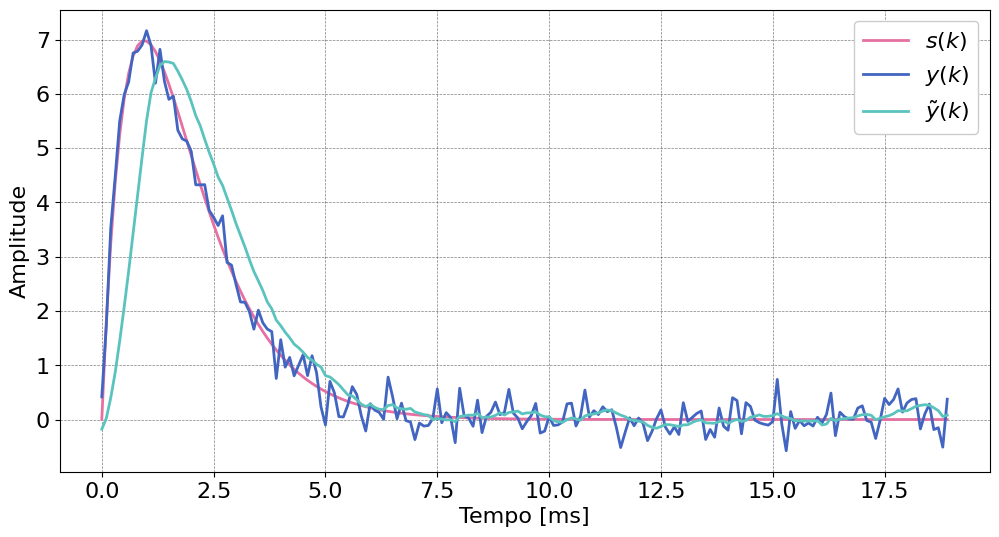

In [3]:
#Função para cálculo do filtro de média móvel:
def FMM(sig, order):
    out = np.empty(len(sig))
    out.fill(np.nan)
    for k in range(order, len(sig)):
        som = 0
        for i in range(order):
            som += (sig[k-i])
        out[k] = (som/order)

    return out

#Aplicação do filtro:
y_ = FMM(y, 10)

#Plot:
plt.figure(2)
plt.plot(t[i0:int(20*(N/tf))], s[i0:int(20*(N/tf))], color='C1', label='$s(k)$')
plt.plot(t[i0:int(20*(N/tf))], y[i0:int(20*(N/tf))], color='C0', label='$y(k)$')
plt.plot(t[i0:int(20*(N/tf))], y_[i0:int(20*(N/tf))], color='C2', label='$\\tilde{y}(k)$')
plt.ylabel('Amplitude')
plt.xlabel('Tempo [ms]')
plt.legend()
plt.savefig('y.eps', dpi=600, transparent=True, bbox_inches='tight')